In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import csv
import tkinter as tk
import pandas as pd
import time
def DatenGenerieren(Störung,Umdrehungen,ProzentderDaten):
    
    def Euler(h, x, func):
        erg = (x+h*func)
        return erg

    def dx(a,b,x,y):
        erg = a*x-b*x*y
        return erg

    def dy(c,d,x,y):
        erg = -c*y+d*x*y
        return erg
    
    #Euler Methode
    
    x0 = 1
    y0 = 0.8

    a= 2/3
    b= 4/3
    c= 1
    d= 1

    steps = Umdrehungen * 10000
    h= 0.001
    
    i= 0
    x = [x0]
    y = [y0]
    t = [0]

    while i <= steps:
        x_i = Euler(h, x[i], dx(a, b, x[i], y[i]))
        y_i = Euler(h, y[i], dy(c, d, x[i], y[i]))
        x.append(x_i)
        y.append(y_i)
    
        t_i = t[i]+h
        t.append(t_i)
        i+=1
        
    #noise genereieren
    
    sigma = Störung/100
    noise = 1+np.random.normal(0,sigma, len(x))

    x= x*noise
    y = y*noise
    
    #x= x[:steps/2]
    #y= y[steps/2]
    
    #Arrays in train und test trennen

    Prey_train = x[:int(steps/2):ProzentderDaten]
    Predator_train = y[:int(steps/2):ProzentderDaten]
    
    Prey_test = x[int(steps/2)::ProzentderDaten]
    Predator_test = y[int(steps/2)::ProzentderDaten]

    return Prey_train, Predator_train, Prey_test, Predator_test

    
def vsTimePloten(Prey,Predator):  
    plt.figure("VSTime")
    plt.plot(Prey, label = "Prey")
    plt.plot(Predator, label = "Predator")
    
    plt.ylabel("Prey Predator")
    plt.xlabel("time")

    plt.grid()
    plt.legend()
    plt.show()

    
    #image = tk.PhotoImage(file=f"VersusTimePlot_Sigma{sigma}.pdf")
    #image_label = tk.Label(fenster, image=image)
    #image_label.image = image
    #image_label.pack()

def PredvsPrey(Prey,Predator):
    
    plt.figure("PredatorVSPrey")
    plt.plot(Predator, Prey, ".", label= f"Prey vs Predator: Noise ")
    
    plt.xlabel("Prey")
    plt.ylabel("Predator")

    plt.grid()
    plt.legend()
    plt.show()
    
    
    #image = tk.PhotoImage(file=f"PreyVsPredPlot_Noise{sigma}.pdf")
    #image_label = tk.Label(fenster, image=image)
    #image_label.image = image
    #image_label.pack()

In [2]:
def Data_preperation(prey_data,predator_data):

    # Kombinieren Sie die Beutetier- und Raubtierdaten zu einer einzigen Matrix für X_train
    X_train = pd.DataFrame(np.column_stack((prey_data[:-1], predator_data[:-1])), columns=['Prey', 'Predator'])

    # Verwenden Sie die nächste Beutetierpopulation als y_train_prey
    y_train_prey = pd.DataFrame(prey_data[1:], columns=['Prey_next'])
    y_train_predator = pd.DataFrame(predator_data[1:], columns=['predator_next'])
    return X_train, y_train_prey, y_train_predator

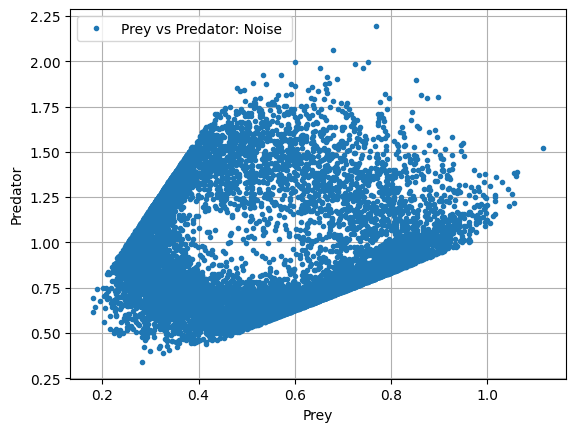

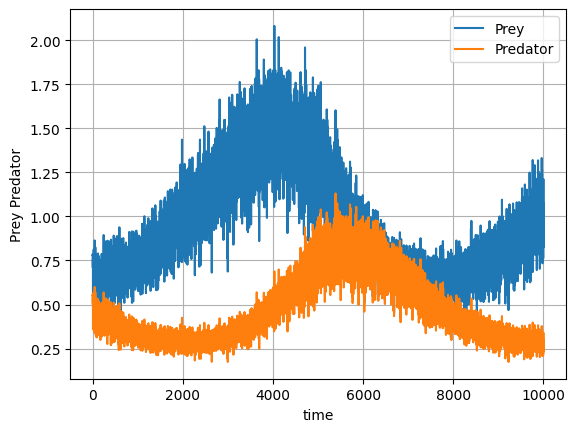

In [6]:
Prey_train, Predator_train, Prey_test, Predator_test =DatenGenerieren(12,2,1)
PredvsPrey(Prey_train, Predator_train)
vsTimePloten(Prey_test,Predator_test)